In [39]:
import os
from pathlib import Path 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mlt 
import seaborn as sns
from termcolor import colored,cprint
import ace_tools_open as tools
from datetime import datetime

In [3]:
features_df = pd.read_csv('../data/features.csv')
stores_df = pd.read_csv('../data/stores.csv')
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [4]:
print("shape: ",features_df.shape)
print("Nulls: ",features_df.isnull().sum().to_dict())
print("nunique: ",features_df.nunique().to_dict())
#[features:Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday]
tools.display_dataframe_to_user(name="Features DataFrame", dataframe=features_df.head()) 
# features_df = features_df[['Store','Date','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday']]

shape:  (8190, 12)
Nulls:  {'Store': 0, 'Date': 0, 'Temperature': 0, 'Fuel_Price': 0, 'MarkDown1': 4158, 'MarkDown2': 5269, 'MarkDown3': 4577, 'MarkDown4': 4726, 'MarkDown5': 4140, 'CPI': 585, 'Unemployment': 585, 'IsHoliday': 0}
nunique:  {'Store': 45, 'Date': 182, 'Temperature': 4178, 'Fuel_Price': 1011, 'MarkDown1': 4023, 'MarkDown2': 2715, 'MarkDown3': 2885, 'MarkDown4': 3405, 'MarkDown5': 4045, 'CPI': 2505, 'Unemployment': 404, 'IsHoliday': 2}
Features DataFrame


In [5]:
print("shape: ",stores_df.shape)
print("Nulls: ",stores_df.isnull().sum().to_dict())
print("nunique: ",stores_df.nunique().to_dict())
stores_df.head() #[features:Store,Type,Size]

shape:  (45, 3)
Nulls:  {'Store': 0, 'Type': 0, 'Size': 0}
nunique:  {'Store': 45, 'Type': 3, 'Size': 40}


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
print("shape: ",train_df.shape)
print("Nulls: ",train_df.isnull().sum().to_dict())
print("nunique: ",train_df.nunique().to_dict())
train_df.head() #[features:Store,Dept,Date,Weekly_Sales,Weekly_Sales]

shape:  (421570, 5)
Nulls:  {'Store': 0, 'Dept': 0, 'Date': 0, 'Weekly_Sales': 0, 'IsHoliday': 0}
nunique:  {'Store': 45, 'Dept': 81, 'Date': 143, 'Weekly_Sales': 359464, 'IsHoliday': 2}


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Lets join the tables on common features


In [7]:
test_df.shape

(115064, 4)

In [8]:
#Join Store table with train table based on Store feature

train_df = train_df.merge(stores_df,how='left',on='Store')
test_df = test_df.merge(stores_df,how='left',on='Store')
print(train_df.shape,test_df.shape)

(421570, 7) (115064, 6)


In [9]:
#Join features table with train table based on Store,Date and IsHoliday feature

train_df = train_df.merge(features_df,how='left',on=['Store','Date','IsHoliday'])
test_df = test_df.merge(features_df,how='left',on=['Store','Date','IsHoliday'])
print(train_df.shape,test_df.shape)

(421570, 16) (115064, 15)


In [10]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [11]:
train_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [12]:
train_df.fillna(0,inplace=True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [14]:
# convert the IsHoliday feature to categorical 
train_df['Type'] = train_df['Type'].astype('category')
test_df['Type'] = test_df['Type'].astype('category')

In [15]:
train_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [16]:
train_df["Date"] = pd.to_datetime(train_df["Date"])
train_df["Year"] = train_df["Date"].dt.year
train_df["Month"] = train_df["Date"].dt.month
train_df["Day"] = train_df["Date"].dt.day
train_df["Week"] = train_df["Date"].dt.isocalendar().week
train_df["Day_of_Week"] = train_df["Date"].dt.weekday
train_df["Day_Name"] = train_df["Date"].dt.day_name()


In [17]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Week,Day_of_Week,Day_Name
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,2010,2,5,5,4,Friday
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,...,0.0,0.0,211.242170,8.106,2010,2,12,6,4,Friday
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,...,0.0,0.0,211.289143,8.106,2010,2,19,7,4,Friday
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,...,0.0,0.0,211.319643,8.106,2010,2,26,8,4,Friday
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,...,0.0,0.0,211.350143,8.106,2010,3,5,9,4,Friday


In [18]:
stores_dep_df = pd.pivot_table(train_df,columns='Dept',index='Store',values='Weekly_Sales',aggfunc='mean')
print(stores_dep_df.shape)
stores_dep_df

(45, 81)


Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


We can see there are some negative values for weekly sales which is wrong, sale value can't be negative, it should be atleast 0. And also we can observe there are 81 values for department and 45 values for stores.

In [19]:
# Lets change the negative values to zero
train_df = train_df.loc[train_df['Weekly_Sales'] > 0]


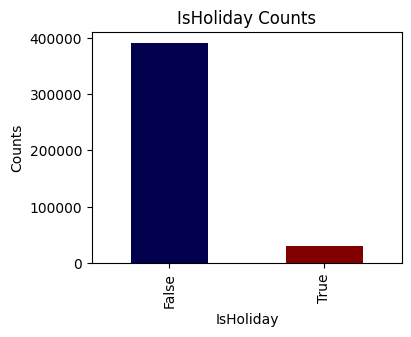

In [20]:
train_df['IsHoliday'].value_counts().plot(kind='bar',title="IsHoliday Counts",ylabel='Counts',\
                                          figsize=(4,3),color=mlt.colormaps['seismic'](np.linspace(0,2,2)))
plt.show()

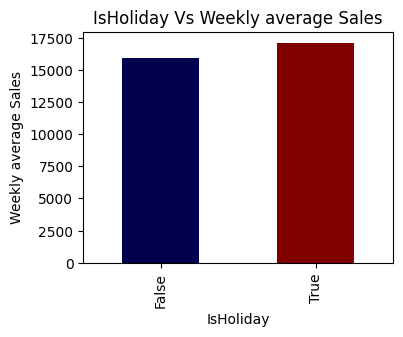

In [24]:
train_df.groupby("IsHoliday")["Weekly_Sales"].mean().plot(kind='bar',title="IsHoliday Vs Weekly average Sales",ylabel='Weekly average Sales',\
                                          figsize=(4,3),color=mlt.colormaps['seismic'](np.linspace(0,2,2)))
plt.show()

We can see the average weekly sales for Holiday days are more compared to non-holiday days, lets check the dates for the holiday days

In [36]:
holiday_dates = (train_df[train_df['IsHoliday']==True]['Date'].unique().strftime("%Y-%m-%d"))
holiday_dates

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [38]:
# We have total of 143 dates and 10 dates are holiday dates and remaining 133 are non-holiday dates
train_df['Date'].nunique() - len(holiday_dates)

133

The following are the common dates for these holidays:

Super Bowl: February 12, 2010; February 11, 2011; February 10, 2012; February 8, 2013

Labor Day: September 10, 2010; September 9, 2011; September 7, 2012; September 6, 2013

Thanksgiving: November 26, 2010; November 25, 2011; November 23, 2012; November 29, 2013

Christmas: December 31, 2010; December 30, 2011; December 28, 2012; December 27, 2013

After September 7, 2012, holidays fall into the test set for prediction. Analyzing the data reveals that average weekly sales are significantly higher on holidays compared to non-holiday days. In the training data, there are 133 weeks of non-holiday sales and 10 weeks of holiday sales.









In [40]:
# Column for Superbowl
superbowl_dates = [datetime(2010, 2, 12), datetime(2011, 2, 11), datetime(2012, 2, 10), datetime(2013, 2, 8)]
train_df["SuperBowl"] = train_df["Date"].isin(superbowl_dates)

# Column for LabourDay
christmas_dates = [datetime(2010, 9, 10), datetime(2011, 9, 9), datetime(2012, 9, 7), datetime(2013, 9, 6)]
train_df["LabourDay"] = train_df["Date"].isin(christmas_dates)

# Column for Thanksgiving
christmas_dates = [datetime(2010, 11, 26), datetime(2011, 11, 25), datetime(2012, 11, 23), datetime(2013, 11, 29)]
train_df["Thanksgiving"] = train_df["Date"].isin(christmas_dates)

# Column for Christmas
christmas_dates = [datetime(2010, 12, 31), datetime(2011, 12, 30), datetime(2012, 12, 28), datetime(2013, 12, 27)]
train_df["Christmas"] = train_df["Date"].isin(christmas_dates)

In [54]:
train_df[["SuperBowl", "LabourDay", "Thanksgiving", "Christmas"]].apply(pd.Series.value_counts)

,SuperBowl,LabourDay,Thanksgiving,Christmas
False,411339,411380,414266,414303
True,8873,8832,5946,5909


In [73]:

holiday_cols = ["SuperBowl", "LabourDay", "Thanksgiving", "Christmas"]
holiday_sales = {
    col: train_df.groupby(col)["Weekly_Sales"].mean() for col in holiday_cols
}
holiday_sales_df = pd.DataFrame(holiday_sales).T
holiday_sales_df.columns = ["Non-Holiday Sales", "Holiday Sales"]

tools.display_dataframe_to_user(name="Holiday vs Non-Holiday Weekly Avg Sales", dataframe=holiday_sales_df)


Holiday vs Non-Holiday Weekly Avg Sales


<Axes: title={'center': 'Avg Weekly sales Vs Holidays'}, ylabel='Weekly Avg Sales'>

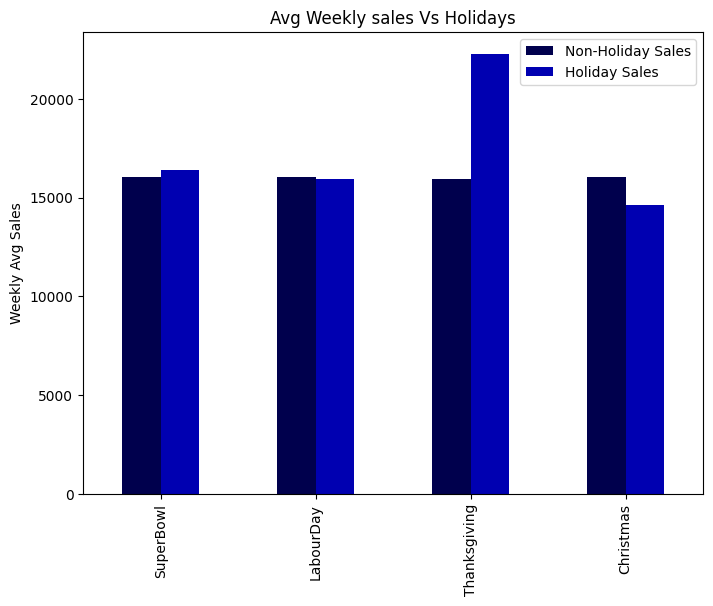

In [93]:
holiday_sales_df.plot(kind='bar',ylabel='Weekly Avg Sales',
                      title='Avg Weekly sales Vs Holidays',
                       figsize=(8,6),color=mlt.colormaps['seismic'](np.linspace(0,1,num=8)))

Thanksgiving drives the highest holiday sales, significantly surpassing non-holiday weeks, indicating peak consumer spending. Super Bowl and Labour Day sales remain stable, with only a slight increase during holidays. Christmas shows a unique trend, where non-holiday sales are higher, suggesting that most shopping happens before the holiday. Businesses should focus on Thanksgiving promotions, run early Christmas campaigns, and expect steady but not extreme sales growth during the Super Bowl and Labour Day periods.